In [2]:
import pandas as pd
import os

# Load data
os.chdir('C:\\Users\\HP\\OneDrive\\Desktop\\DS course')
df = pd.read_csv('Titanic-Dataset.csv')


# Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head()


Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing numeric columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify
print("Remaining Missing Values:", df.isnull().sum().sum())


Remaining Missing Values: 0


In [4]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


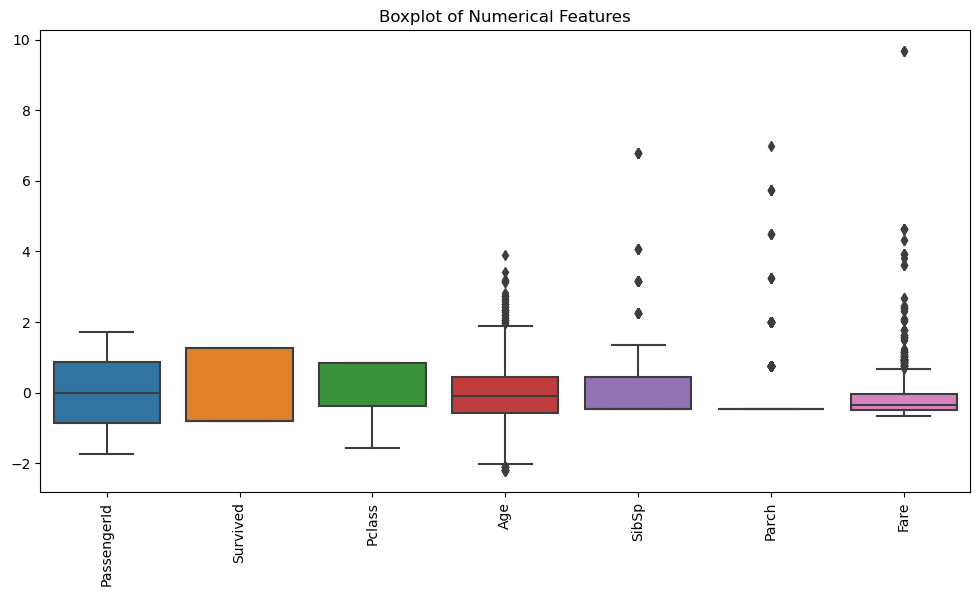

Before outlier removal: (891, 1726)
After outlier removal: (577, 1726)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

# IQR method to remove outliers
Q1 = df_encoded[num_cols].quantile(0.25)
Q3 = df_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_encoded[~((df_encoded[num_cols] < (Q1 - 1.5 * IQR)) | 
                          (df_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before outlier removal:", df_encoded.shape)
print("After outlier removal:", df_cleaned.shape)
